In [2]:
import sys
print(sys.path)


['/Users/paul/anaconda3/envs/procgen/lib/python38.zip', '/Users/paul/anaconda3/envs/procgen/lib/python3.8', '/Users/paul/anaconda3/envs/procgen/lib/python3.8/lib-dynload', '', '/Users/paul/anaconda3/envs/procgen/lib/python3.8/site-packages', '/Users/paul/Projects/procgen']


In [1]:
import sys
import os
import torch.distributions
import torch
import gym
import random
import numpy as np
from procgen import ProcgenGym3Env
import imageio
import matplotlib.pyplot as plt
import typing
import math
from collections import defaultdict
from typing import Tuple, Dict, Callable, List, Optional
from dataclasses import dataclass
# from src.policies_modified import ImpalaCNN
from procgen_tools.procgen_wrappers import VecExtractDictObs, TransposeFrame, ScaledFloatFrame
from gym3 import ToBaselinesVecEnv
import seaborn as sns

# Import custom modules
import heist
import helpers
from helpers import generate_action, load_model

# Reload modules automatically
%load_ext autoreload
%autoreload 2


ModuleNotFoundError: No module named 'src'

In [ ]:
# Load model and setup environment
difficulty = 'hard'
model = helpers.load_model(model_path=f"../model_{difficulty}.pt")
model_activations = helpers.ModelActivations(model)
layer_paths = helpers.get_model_layer_names(model)

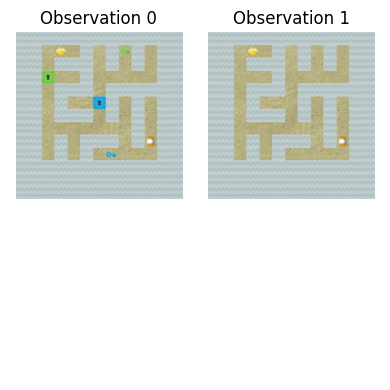

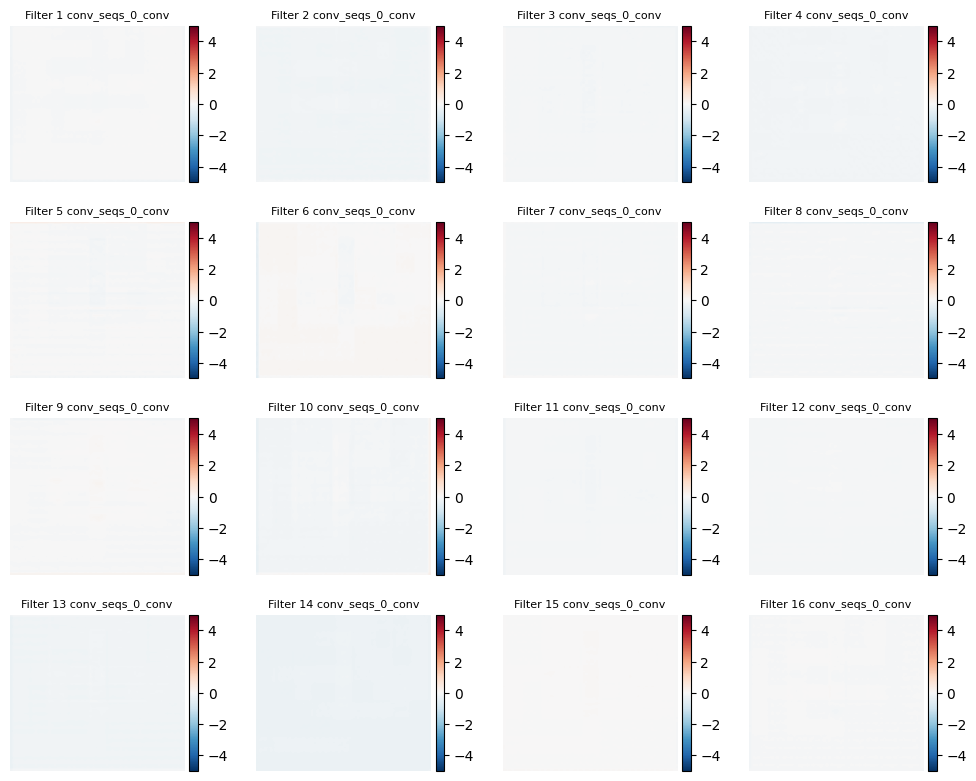

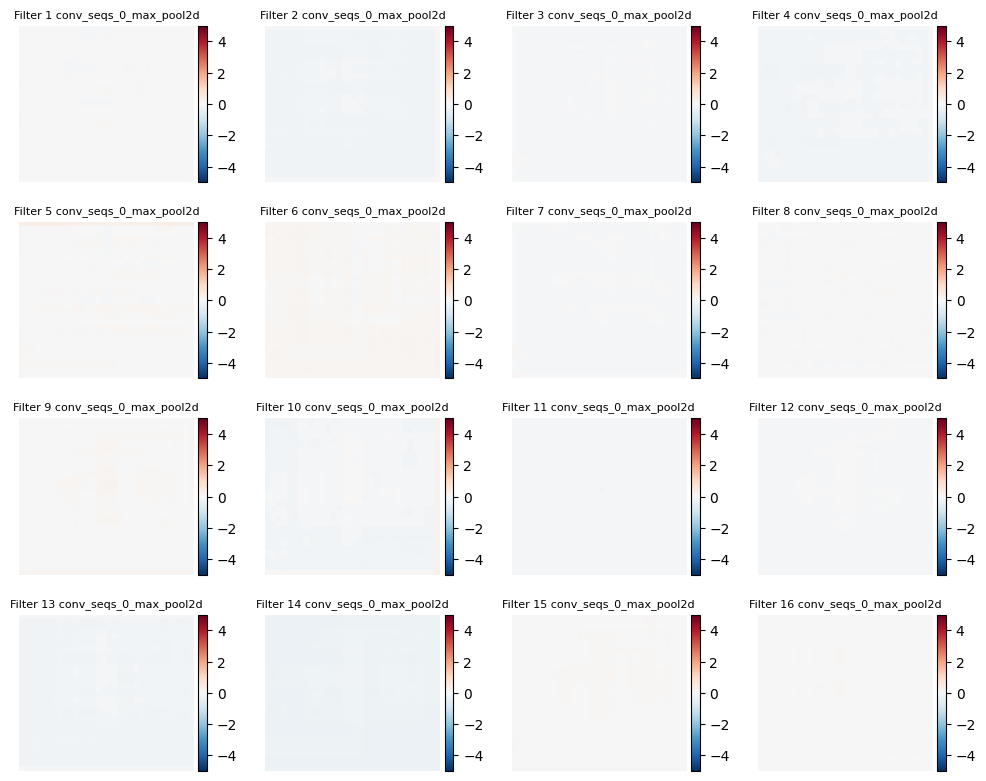

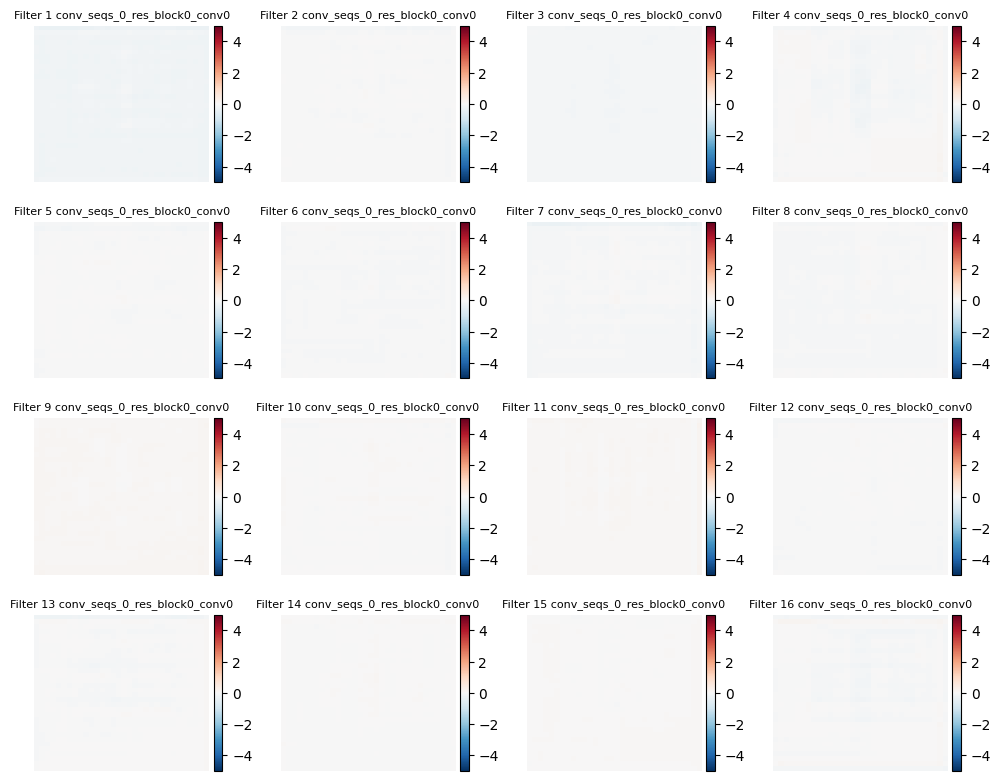

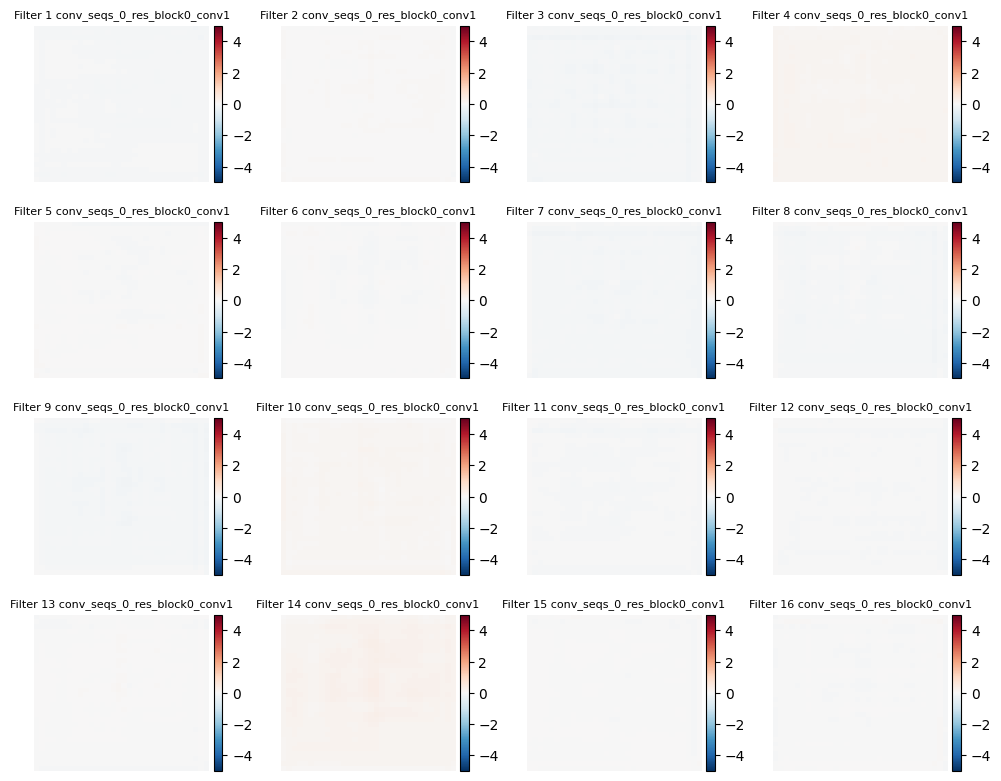

KeyboardInterrupt: 

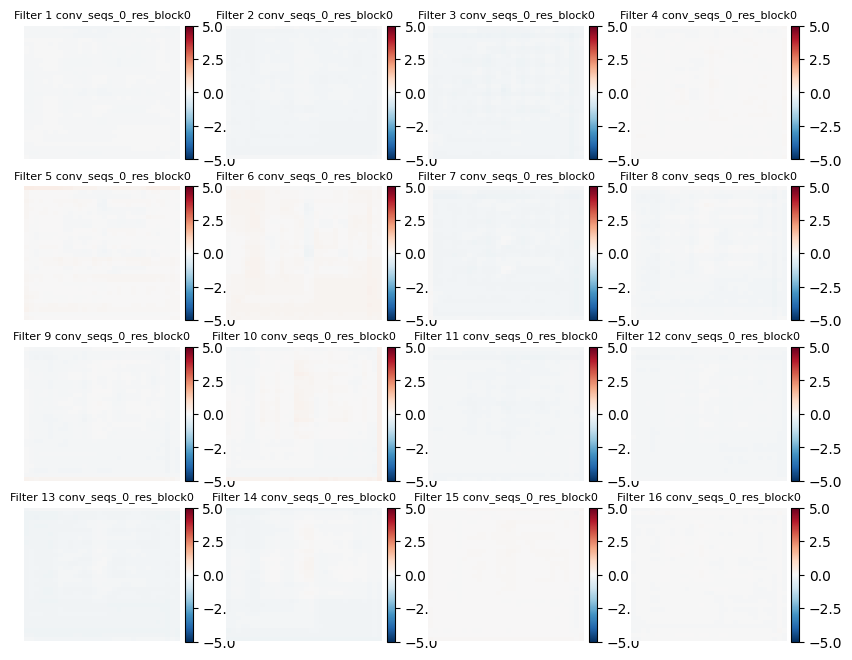

In [ ]:
# Main workflow example: Remove entities and plot differences
venv = heist.create_venv(1, 15, 1, 0, difficulty)
state = heist.state_from_venv(venv, 0)

# Reset environment and remove entities
obs_list, frames_list = helpers.make_mazes_with_entities_removed(venv, [["red_key", "blue_key", "green_key", "red_lock", "blue_lock", "green_lock"]])

# Plot mazes
helpers.plot_multiple_observations(frames_list)

# Run model and calculate activations
activations_list = helpers.calc_activations_for_obs_list(model_activations, obs_list, layer_paths)
objective_vectors = helpers.create_objective_vectors(model_activations, layer_paths, num_samples = 8)
objective_vectors_list = list(objective_vectors.values()) # Convert to list for consistency with calc_weighted_activations
# [gem, blue key, green key, red key, blue lock, green lock, red lock, empty]

# Calculate weighted activations
weighted_activations = helpers.calc_weighted_activations(objective_vectors_list, activation_weightings = [6, -1, -1, -1, -1, -1, -1, 0])
# weighted_activations = helpers.calc_weighted_activations([activations_list[1], weighted_activations], activation_weightings = [1,-1])


# Visualize activations
helpers.plot_activations_for_layers_rb_max(objective_vectors_list[0], None, None, 5)

